### Importing the required libraries

In [1]:
#importing the libraries
import librosa
import soundfile
import os, glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

In [2]:
#Extract features like mfcc, chroma, mel from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

In [3]:
#defining dictionary to hold emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [4]:
#Loading the data and extracting the features for each sound file
ohe=preprocessing.OneHotEncoder(sparse=False)
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("C:\\Users\\Sreeja\\OneDrive\\Desktop\\Datasethcl\\ravdess\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    y=np.array(y)
    y=y.reshape((-1,1))
    y_=ohe.fit_transform(y)
    return train_test_split(np.array(x), y_, test_size=test_size, random_state=9)

### Plotting the audio file's waveform

In [5]:
data, sampling_rate = librosa.load('C:\\Users\\Sreeja\\OneDrive\\Desktop\\Datasethcl\\ravdess\\Actor_02\\03-01-01-01-01-02-02.wav')


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


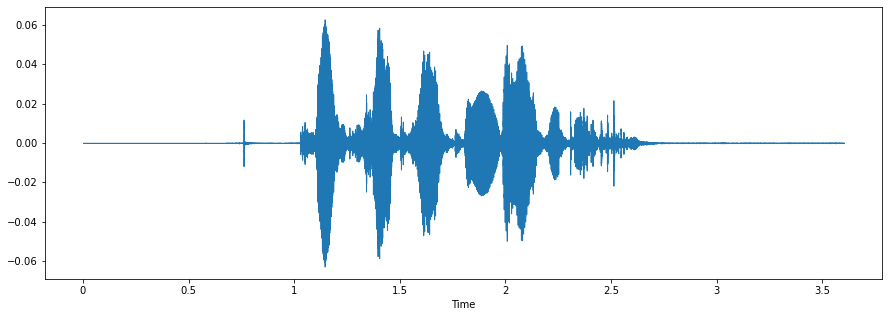

In [6]:
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [7]:
from scipy.io import wavfile
from IPython.display import Audio
f_name = 'C:\\Users\\Sreeja\\OneDrive\\Desktop\\Datasethcl\\ravdess\\Actor_02\\03-01-01-01-01-02-02.wav'
fs, wav = wavfile.read(f_name)
Audio(f_name,autoplay=True)

In [8]:
data, sampling_rate = librosa.load('C:\\Users\\Sreeja\\OneDrive\\Desktop\\Datasethcl\\ravdess\\Actor_05\\03-01-01-01-01-02-05.wav')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


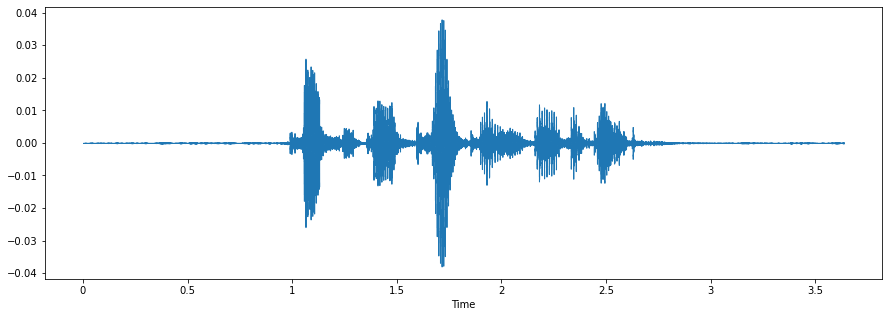

In [9]:
%pylab inline
import os
import pandas as pd
import librosa
import glob 

plt.figure(figsize=(15, 5))
librosa.display.waveshow(data, sr=sampling_rate)

In [10]:
f_name = 'C:\\Users\\Sreeja\\OneDrive\\Desktop\\Datasethcl\\ravdess\\Actor_05\\03-01-01-01-01-02-05.wav'
fs, wav = wavfile.read(f_name)
Audio(f_name,autoplay=True)

### Dividing the data into test and train

In [11]:
#splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test=load_data(test_size=0.25)

C:\Users\Sreeja\AppData\Local\Temp\ipykernel_23276\3272017683.py:16: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Sreeja\AppData\Local\Temp\ipykernel_23276\3272017683.py:16: FutureWarning: Pass y=[0.0000000e+00 3.0517578e-05 3.0517578e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:\Users\Sreeja\AppData\Local\Temp\ipykernel_23276\3272017683.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00 -3.0517578e-05 ... -3.0517578e-05
 -3.0517578e-05 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
C:

In [12]:
x_train.shape[0]

576

In [13]:
x_test.shape[0]

192

In [14]:
#Observe the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


### Feature Extraction

In [15]:
#Number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


### Using MLP Classifier

In [16]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

### Fit/train the model

In [17]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [18]:
y_pred=model.predict(x_test)

### Evaluation/ Loading the model

In [19]:
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 64.06%


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89        57
           1       0.72      0.75      0.73        48
           2       0.65      0.81      0.72        37
           3       0.79      0.60      0.68        50

   micro avg       0.77      0.77      0.77       192
   macro avg       0.76      0.76      0.76       192
weighted avg       0.77      0.77      0.76       192
 samples avg       0.70      0.77      0.72       192



C:\Users\Sreeja\anaconda3\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Predicting emotions on the test data

In [21]:
file_=r"C:\Users\Sreeja\Downloads\StarWars3.wav"
feature=extract_feature(file_, mfcc=True, chroma=True, mel=True)
x_=[]
x_.append(feature)
pred=model.predict_proba(x_)
print(pred)

[[1.65885496e-64 8.76342559e-34 1.00000000e+00 4.87519745e-18]]


C:\Users\Sreeja\AppData\Local\Temp\ipykernel_23276\3272017683.py:16: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.0458374   0.00079346
  0.01263428] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [22]:
file_=r"C:\Users\Sreeja\Downloads\preamble10.wav"
feature=extract_feature(file_, mfcc=True, chroma=True, mel=True)
x_=[]
x_.append(feature)
pred=model.predict_proba(x_)
print(pred)

[[7.95344624e-05 1.06149194e-01 6.46714753e-06 2.72068229e-04]]


C:\Users\Sreeja\AppData\Local\Temp\ipykernel_23276\3272017683.py:16: FutureWarning: Pass y=[ 1.0986328e-03  8.8500977e-04  6.7138672e-04 ...  5.7983398e-04
 -3.0517578e-05 -4.2724609e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)


In [23]:
file_=r"C:\\Users\\Sreeja\\OneDrive\\Desktop\\Datasethcl\\ravdess\\Actor_05\\03-01-01-01-01-02-05.wav"
feature=extract_feature(file_, mfcc=True, chroma=True, mel=True)
x_=[]
x_.append(feature)
pred=model.predict_proba(x_)
print(pred)

[[0.84270563 0.11460421 0.0388736  0.01582482]]


C:\Users\Sreeja\AppData\Local\Temp\ipykernel_23276\3272017683.py:16: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -3.0517578e-05
 -3.0517578e-05 -6.1035156e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
